WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Alpha of both groups: 5.9715045308618695
Beta of both groups: 0.6447263441214969


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_group1, beta_group2, alpha_group1, alpha_group2]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.


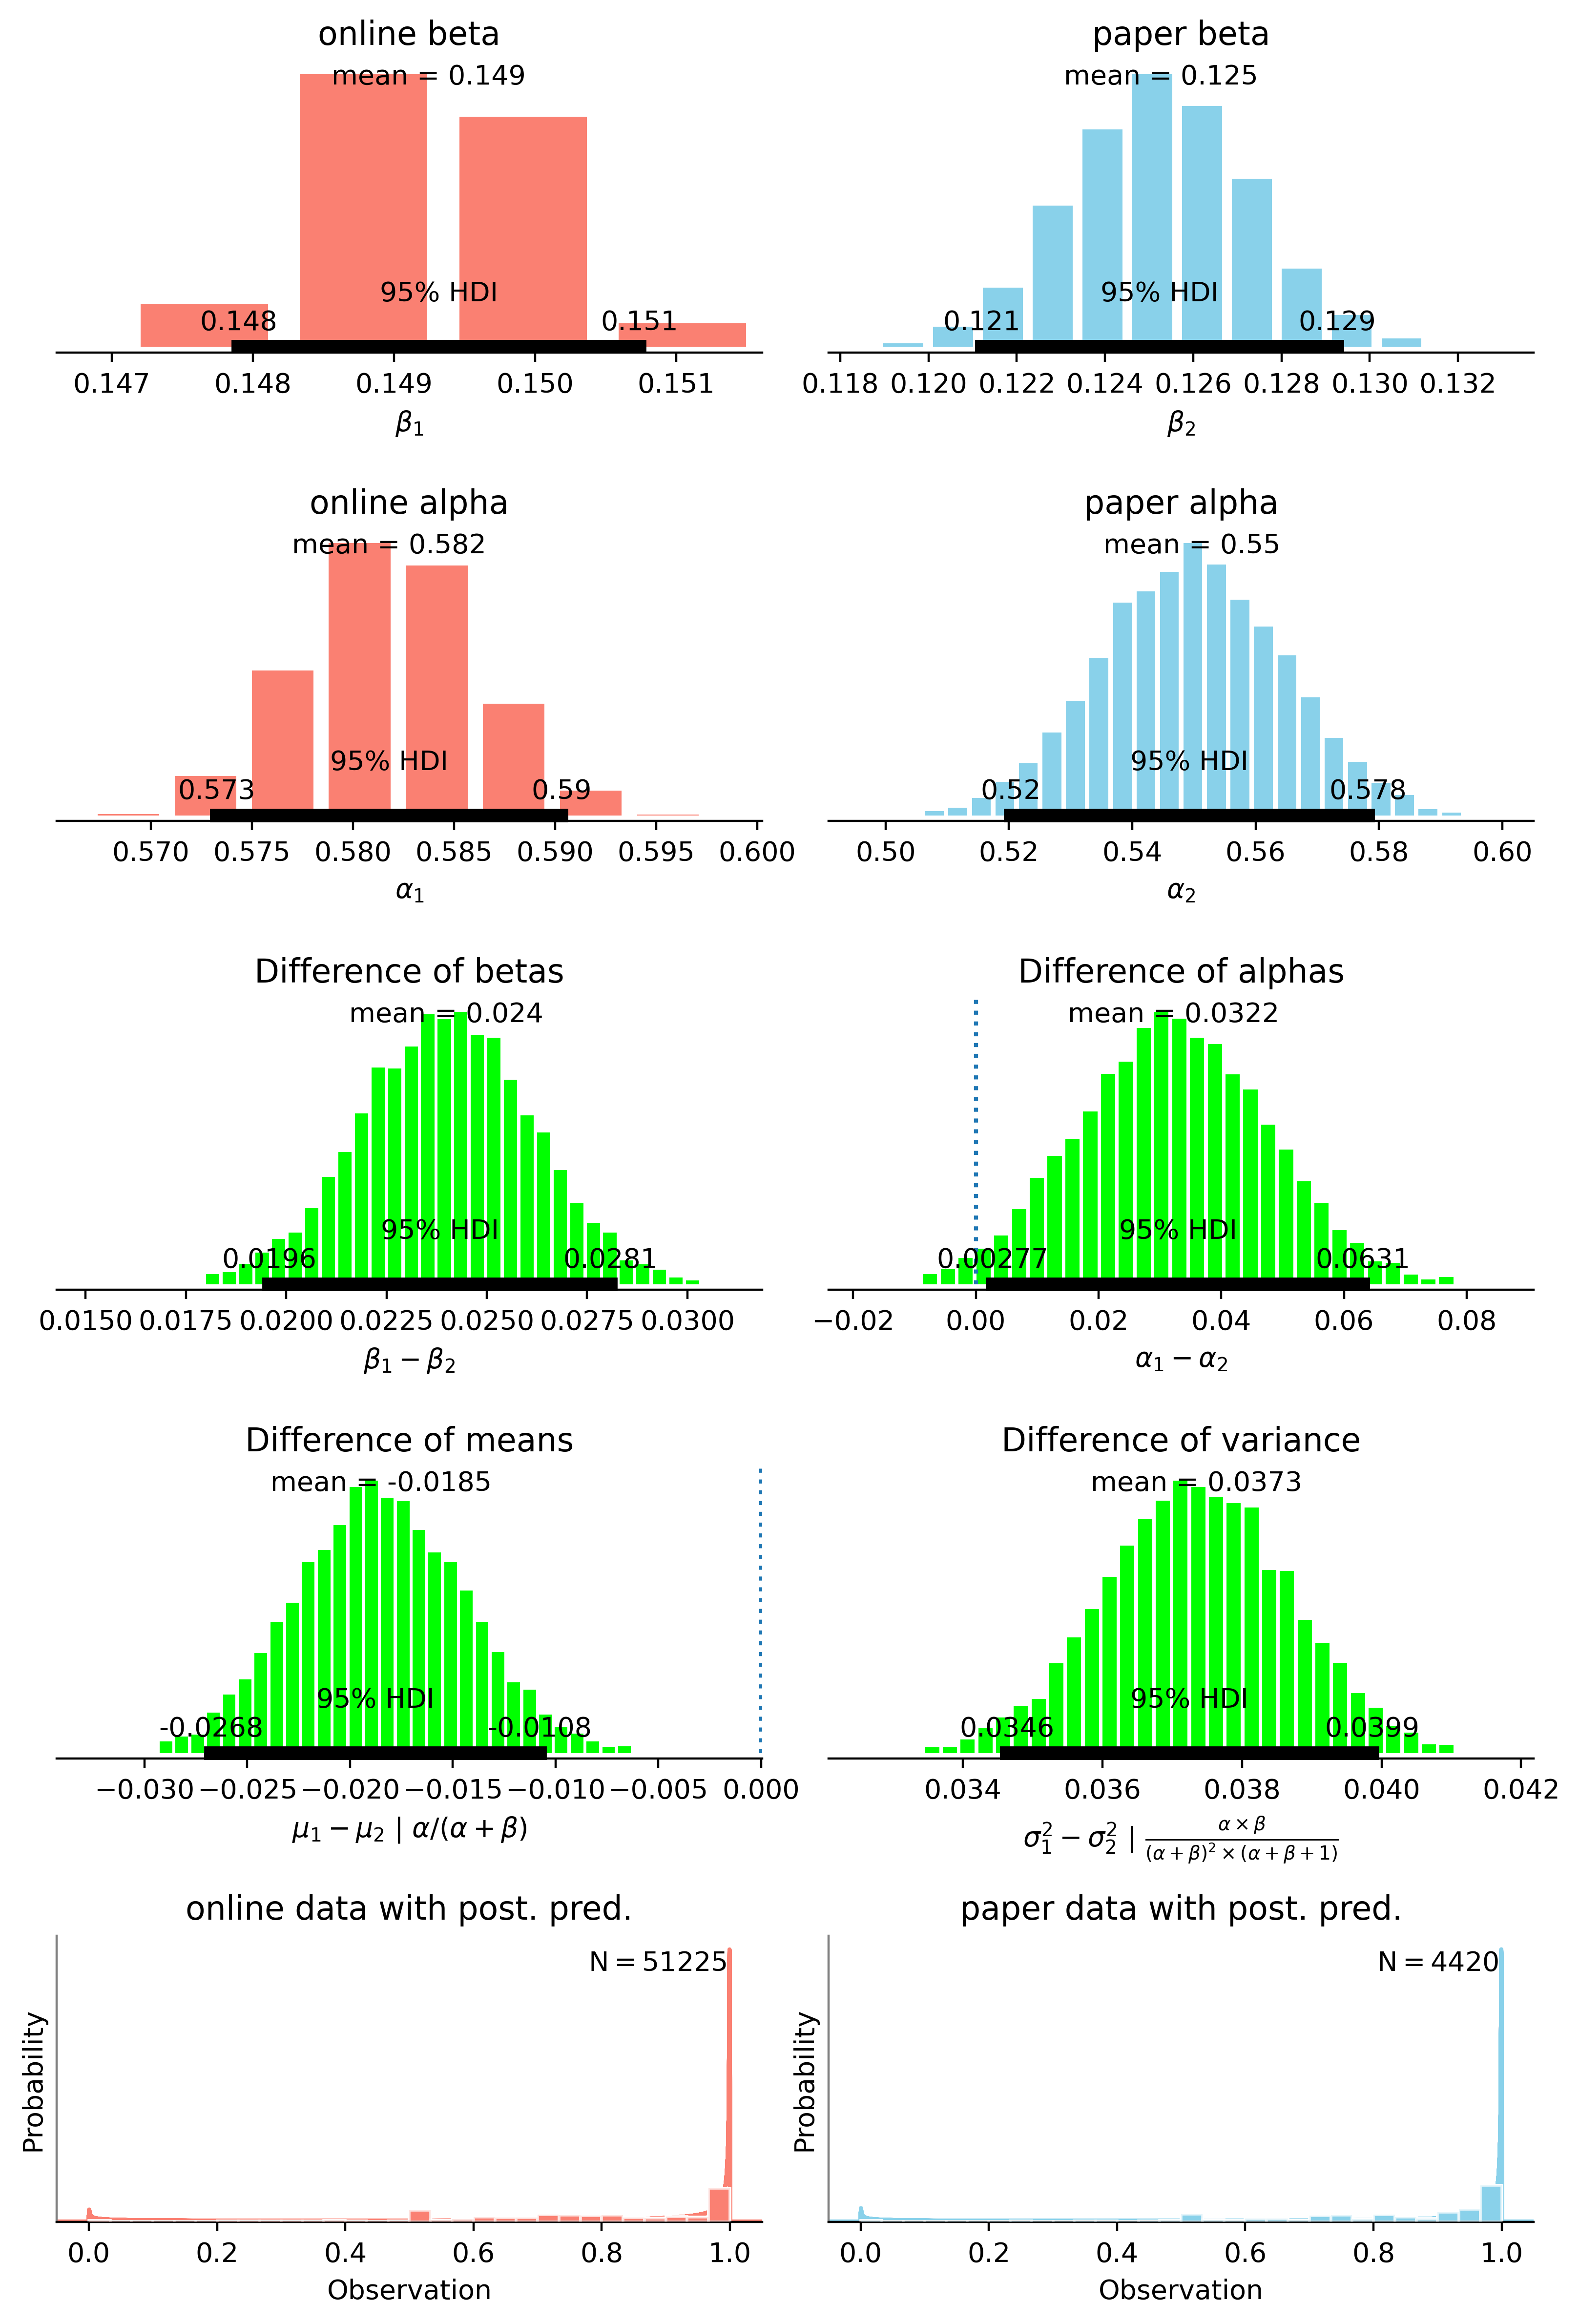

In [1]:
from bayes_test import BayesianHypothesisTestBeta
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')

# For beta distribution, Elements must be between 0 and 1, if 1 then will throw an infinite error (beta only)!!
online[online == 0] += 1e-10
paper[paper == 0] += 1e-10
online[online < 0] = 0
paper[paper < 0] = 0
online[online == 1] -= 1e-10
paper[paper == 1] -= 1e-10


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestBeta(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
# This will computer various effect sizes
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'beta_group1': {'mean': 0.14924728199460882,
  'hdi_min': 0.14789779656840746,
  'hdi_max': 0.15074042020756664},
 'beta_group2': {'mean': 0.12526590358110057,
  'hdi_min': 0.1212108857729883,
  'hdi_max': 0.12926553128644983},
 'alpha_group1': {'mean': 0.5818023436375223,
  'hdi_min': 0.5732630423962022,
  'hdi_max': 0.5903288250803665},
 'alpha_group2': {'mean': 0.5496925322866064,
  'hdi_min': 0.5203076719311408,
  'hdi_max': 0.5782511903113894},
 'diff_beta': {'mean': 0.023983663831145887,
  'hdi_min': 0.019577360385290454,
  'hdi_max': 0.028086559025961425},
 'diff_alpha': {'mean': 0.0322050297906491,
  'hdi_min': 0.0027749253404851792,
  'hdi_max': 0.06313143719190206},
 'diff_means': {'mean': -0.018497224380674176,
  'hdi_min': -0.026758054591381253,
  'hdi_max': -0.010765988503664947},
 'diff_variance': {'mean': 0.037344976566174554,
  'hdi_min': 0.03463022977202536,
  'hdi_max': 0.03986843742687318},
 'cliff_delta': {'cliff_delta': 0.5391648752},
 'non_overlap_effect_size': {